### Wstęp do Uczenia Maszynowego 
##### Laboratorium 9

### 1. Przygotowanie danych

a ) wartości odstające

b) braki danych

### 2. Pipeline (scikit-learn)

<img src="pipeline.png" alt="drawing" width="600"/>

*https://medium.com/ai-made-simple/pipelines-in-scikit-learn-46c61c5c60b2*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("titanic.csv")
y = df.survived
X = df.drop(["survived"], axis = 1)

### Zadanie 1
-----
Przyjrzyj się danym `titanic`. Czy wymagają jakiegoś wstępnego przygotowania?

In [3]:
X.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [7]:
X.describe(include="all")

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,486,121.000000,745
unique,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,27,NaN,369
top,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN,"New York, NY"
freq,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,39,NaN,64
mean,2.294882,NaN,NaN,29.881135,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN,160.809917,NaN
std,0.837836,NaN,NaN,14.413500,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN,97.696922,NaN
min,1.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN
25%,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,72.000000,NaN
50%,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,155.000000,NaN
75%,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,256.000000,NaN


In [5]:
X.isnull().sum()

pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [8]:
y.value_counts()

survived
0    809
1    500
Name: count, dtype: int64

array([[<Axes: title={'center': 'pclass'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'sibsp'}>,
        <Axes: title={'center': 'parch'}>],
       [<Axes: title={'center': 'fare'}>,
        <Axes: title={'center': 'body'}>]], dtype=object)

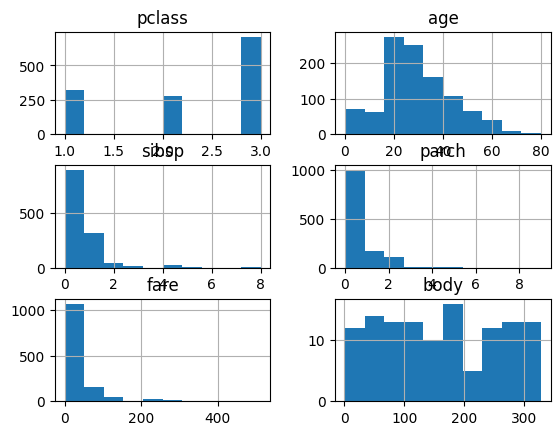

In [9]:
X.hist()

### Zadanie 2
-----
Przygotuj wektor `numerical_features` i `categorical_features`, które będą odpowiednio zawierały nazwy kolumn numerycznych i kategorycznych.

In [10]:
X.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [22]:
numerical_features = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'body']

In [23]:
categorical_features = ['name', 'sex', 'cabin', 'ticket', 'embarked', 'boat', 'home.dest']

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numerical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

### Zadanie 3
-----
Przygotuj `pipeline` dla zmiennych kategorycznych. 
Użyj `SimpleImputer()` o startegii wyboru najczęstszej kategorii.
Użyj `OneHotEncoder()` o strategii 'ignore' dla argumentu 'handle_unknown'.

In [25]:
categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

------
#### Column Transformer + Model

In [26]:
from sklearn.compose import ColumnTransformer

preprocesser = ColumnTransformer([
    ("numerical", numerical_transformer, numerical_features),
    ("categorical", categorical_transformer, categorical_features)
])

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
pipeline = Pipeline([
    ("preprocesser", preprocesser),
    ("model", DecisionTreeClassifier())
])

In [29]:
pipeline

Pipeline(steps=[('preprocesser',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['pclass', 'age', 'sibsp',
                                                   'parch', 'fare', 'body']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['name', 'sex', 'cabin',
                                                   'ticket', 'embarked', 'boat',
                                                   'home.dest'])])),
                ('model', DecisionTreeClassifier())])

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocesser',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['pclass', 'age', 'sibsp',
                                                   'parch', 'fare', 'body']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['name', 'sex', 'cabin',
                                                   'ticket', 'embarked', 'boat',
                                                   'home.dest'])])),
                ('model', DecisionTreeClassifier())])

In [33]:
pipeline.score(X_train, y_train)

1.0

In [32]:
pipeline.score(X_test, y_test)

0.9465648854961832

### Zadanie 4
-----
Wczytaj zbiór danych `pima.csv`. Przyjrzyj się się zmiennej `BloodPressure`. Narysuj jej rozkład względem y.

In [31]:
pima = pd.read_csv("pima.csv")

In [36]:
import seaborn as sns
sns.set(style="darkgrid")

c:\Users\frane\anaconda3\envs\ML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\frane\anaconda3\envs\ML\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\frane\anaconda3\envs\ML\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\frane\anaconda3\envs\ML\lib\site-packages\seaborn\_oldcore.py:1075: FutureW

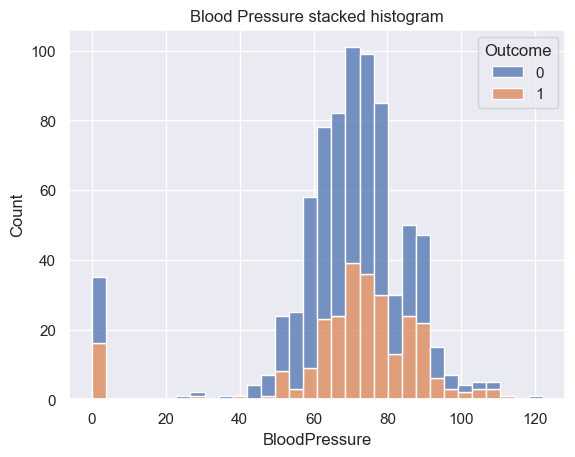

In [ ]:
sns.histplot(data=pima, x="BloodPressure", hue="Outcome")
plt.title("Blood Pressure stacked histogram")
plt.show()

### Zadanie 5
-----
a) Zastąp wartości 0 zmiennej `BloodPressure` jako braki danych. Podziel dane na zbiór treningowy i testowy w proporcji 7:3. Następnie przygotuj `pipeline`, który będzie składał się z metody imputacji danych poprzez średnią z pozostałych obserwacji. Kolejnym elementem `pipeline` będzie stworzenie modelu drzewa. Wylicz miarę `accuracy` na zbiorze treningowym i testowym.

b) Do `pipeline` dodajmy optymalizację parametrów używając `GridSearch` z 3-krotną krowswalidacją. Rozważmy poszczególne parametry i ich wartości:
- maksymalna głębokość [5, 6, ..., 12]
- minimalna liczba obserwacji w liściu [3, 4, ..., 9]

c) Jakie parametry okazały się optymalne? Wylicz miarę dokładności oraz ROC AUC. Porównaj wyniki dla optymalnych parametrów z bazowym modelem drzewa.

In [40]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [52]:
pima[["BloodPressure"]] = pima[["BloodPressure"]].replace(0, np.nan)

In [53]:
X = pima.drop(["Outcome"], axis=1)
y = pima.Outcome

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
numerical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

preprocesser = ColumnTransformer([
    ("numerical", numerical_transformer, X.columns)
])

pipeline = Pipeline([
    ("preprocesser", preprocesser),
    ("model", DecisionTreeClassifier())
])

In [57]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocesser',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object'))])),
                ('model', DecisionTreeClassifier())])

In [59]:
pipeline.score(X_train, y_train)

1.0

In [58]:
pipeline.score(X_test, y_test)

0.7272727272727273

In [60]:
from sklearn.model_selection import GridSearchCV

In [66]:
pipeline_b = Pipeline([
    ("imputer", SimpleImputer()),
    ("scaler", StandardScaler()),
    ("model", DecisionTreeClassifier())
])

param_grid = {
    'imputer__strategy' : ['mean', 'median'],
    'model__max_depth' : np.arange(5, 13),
    'model__min_samples_leaf' : np.arange(4, 10)
}

grid_pipeline = GridSearchCV(pipeline_b, param_grid, cv=3)

In [67]:
grid_pipeline.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('model', DecisionTreeClassifier())]),
             param_grid={'imputer__strategy': ['mean', 'median'],
                         'model__max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12]),
                         'model__min_samples_leaf': array([4, 5, 6, 7, 8, 9])})

In [68]:
grid_pipeline.best_params_

{'imputer__strategy': 'mean',
 'model__max_depth': 9,
 'model__min_samples_leaf': 9}

In [69]:
grid_pipeline.best_score_

0.7597765363128491